In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

In [2]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1./255)

train_dataset = train.flow_from_directory("C:\\Users\\manuravi\\Desktop\\myproject\\Final_Winter_project\\train",
                                          target_size=(150,150),
                                          batch_size = 16,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("C:\\Users\\manuravi\\Desktop\\myproject\\Final_Winter_project\\test",
                                          target_size=(150,150),
                                          batch_size =16,
                                          class_mode = 'binary')

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [3]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80:20 split
)

# Loading and augmenting training data
train_generator = train_datagen.flow_from_directory(
    'C:\\Users\\manuravi\\Desktop\\myproject\\Final_Winter_project\\train',
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary',
    subset='training'  # specify this is the training set
)

# Validation data without augmentation
validation_generator = train_datagen.flow_from_directory(
    'C:\\Users\\manuravi\\Desktop\\myproject\\Final_Winter_project\\train',
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary',
    subset='validation'  # specify this is the validation set
)


Found 447 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


In [4]:
# Define the model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [5]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, steps_per_epoch=27, epochs=15, validation_data=validation_generator)

Epoch 1/15


27/27 [==============================] - 22s 730ms/step - loss: 0.6998 - accuracy: 0.4571 - val_loss: 0.6906 - val_accuracy: 0.5273
Epoch 2/15
27/27 [==============================] - 19s 706ms/step - loss: 0.6896 - accuracy: 0.5290 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 3/15
27/27 [==============================] - 19s 703ms/step - loss: 0.6903 - accuracy: 0.5104 - val_loss: 0.6856 - val_accuracy: 0.5364
Epoch 4/15
27/27 [==============================] - 19s 714ms/step - loss: 0.6760 - accuracy: 0.5777 - val_loss: 0.6780 - val_accuracy: 0.5182
Epoch 5/15
27/27 [==============================] - 19s 701ms/step - loss: 0.6719 - accuracy: 0.6032 - val_loss: 0.6875 - val_accuracy: 0.5091
Epoch 6/15
27/27 [==============================] - 19s 709ms/step - loss: 0.6867 - accuracy: 0.5499 - val_loss: 0.6778 - val_accuracy: 0.5545
Epoch 7/15
27/27 [==============================] - 20s 741ms/step - loss: 0.6573 - accuracy: 0.6288 - val_loss: 0.6532 - val_accuracy: 0.64

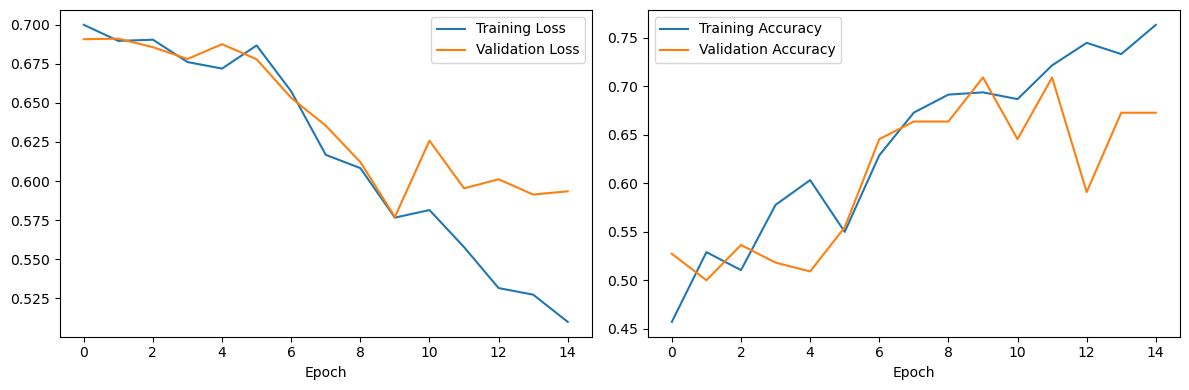

In [6]:
import pandas as pd

# Plot training history
history_df = pd.DataFrame(history.history)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(history_df['loss'], label='Training Loss')
axes[0].plot(history_df['val_loss'], label='Validation Loss')
axes[1].plot(history_df['accuracy'], label='Training Accuracy')
axes[1].plot(history_df['val_accuracy'], label='Validation Accuracy')
for ax in axes:
    ax.set_xlabel('Epoch')
    ax.legend()
plt.tight_layout()
plt.show()

In [7]:
test_dataset = test.flow_from_directory("C:\\Users\\manuravi\\Desktop\\myproject\\Final_Winter_project\\test",
                                          target_size=(150,150),
                                          batch_size =16,
                                          class_mode = 'binary',
                                          color_mode='rgb',  # Assuming your model was trained on RGB images
                                          shuffle=False,  # Important to keep the order of predictions consistent with true labels
                                        )
predictions=model.predict(test_dataset)
predicted_labels = (predictions > 0.38).astype(int).flatten()
true_labels = test_dataset.classes
accuracy = accuracy_score(true_labels, predicted_labels)
f1=f1_score(true_labels,predicted_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'f1_score: {f1 * 100:.2f}%')

Found 140 images belonging to 2 classes.
9/9 [==============================] - 3s 283ms/step
Accuracy: 62.86%
f1_score: 66.67%


In [8]:
# Prediction function
def predictImage(filename):
    img = image.load_img(filename, target_size=(150, 150))
    plt.imshow(img)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    
    if prediction > 0.5:
        plt.xlabel("DOG", fontsize=30)
    else:
        plt.xlabel("CAT", fontsize=30)

1/1 [==============================] - 0s 125ms/step


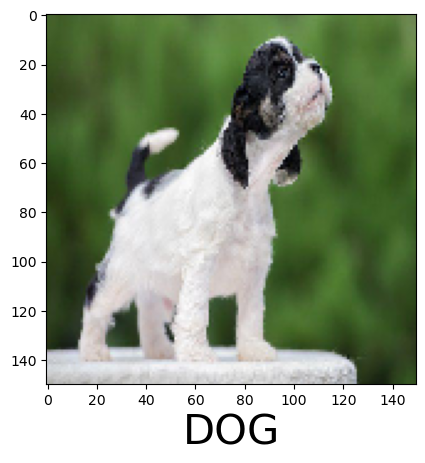

In [9]:
from tensorflow.keras.preprocessing import image

# Example usage
predictImage("C:\\Users\\manuravi\\Desktop\\myproject\\Final_Winter_project\\test\\dogs\\dog_142.jpg")

1/1 [==============================] - 0s 31ms/step


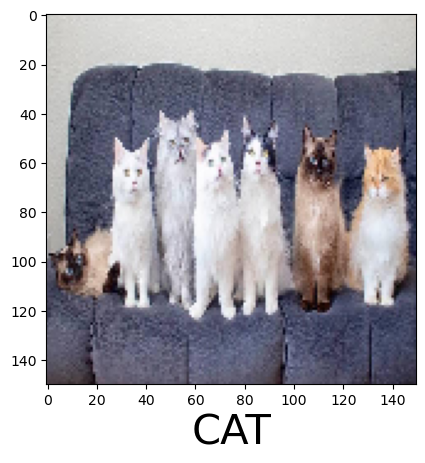

In [10]:
# Example usage
predictImage("C:\\Users\\manuravi\\Desktop\\myproject\\Final_Winter_project\\test\\cats\\cat_162.jpg")

1/1 [==============================] - 0s 31ms/step


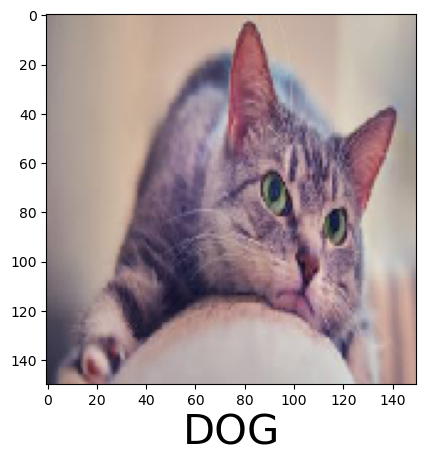

In [11]:
# Example usage
predictImage("C:\\Users\\manuravi\\Desktop\\myproject\\Final_Winter_project\\test\\cats\cat_433.jpg")

1/1 [==============================] - 0s 31ms/step


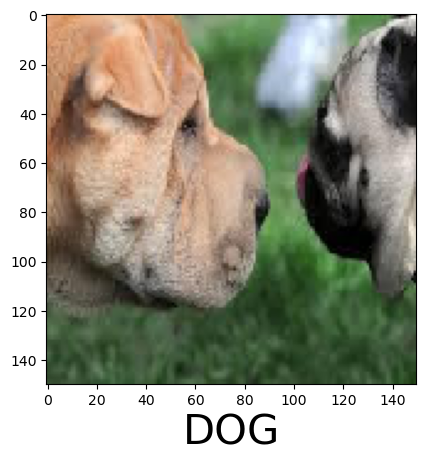

In [12]:
# Example usage
predictImage("C:\\Users\\manuravi\\Desktop\\myproject\\Final_Winter_project\\test\\dogs\\dog_517.jpg")